**Disciplina**: Introdução ao processamento de dados

**Aluno**: Felipe Alves da Silva

**Matrícula**: 2329032

**API A SER UTILIZADA**: MERCADO LIVRE API (`https://api.mercadolibre.com/`)
> Link da documentação: `https://developers.mercadolivre.com.br/pt_br/api-docs-pt-br`

## CONEXÃO NA API E OBTENÇÃO DE DADOS

In [1]:
import requests as req
import pandas as pd
import urllib.parse
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt
from datetime import datetime

Informações por busca de produto: `Notebook gamer lenovo loq`

In [2]:
consulta = 'notebook gamer lenovo loq'

url_1 = f'https://api.mercadolibre.com/sites/MLB/search?q={urllib.parse.quote(consulta)}'

In [3]:
# Realizando requisição 

res = req.get(url_1)

if res.status_code == 200:
    print(f'Requisição atendida: {res.status_code}')
    data = res.json()
else:
    print(f'Erro em requisição: {res.status_code}')

Requisição atendida: 200


In [4]:
# Verificando paginações da requisição

data['paging']

{'total': 160, 'primary_results': 25, 'offset': 0, 'limit': 50}

Obtendo a quantidade dos dados total

In [5]:
limit = 50
offset = 0

data_total = []

while True:
    query_url = f'{url_1}&limit={limit}&offset={offset}'
    response = req.get(query_url)
    
    if response.status_code == 200:
        data = response.json()
        data_total.extend(data['results'])

        offset += limit

        if offset >= data['paging']['total']:
            break
    else:
        print(f"Erro na req: {response.status_code}")
        break

In [6]:
# Exibir total de dados obtidos das paginas 

print(f' Total de dados: {len(data_total)}')

 Total de dados: 157


Transformando os dados JSON em um DataFrame

In [26]:
df_data = pd.DataFrame(data_total)

In [27]:
# Amostra de dados

df_data.sample(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,...,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,differential_pricing,inventory_id,variation_filters,variations_data
37,MLB4186319286,Notebook Ideapad Gaming 3i I5-11300h 8gb 512gb...,new,838402-MLU70925817274_082023,MLB25867347,gold_special,https://www.mercadolivre.com.br/notebook-ideap...,buy_it_now,MLB,MLB1652,...,"[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 12, 'amount': 649.07, 'rate': 15....",None,True,None,[],NaN,None,NaN,NaN
126,MLB4623531028,Notebook Lenovo Thinkpad E470 Core I5 7th 8gb ...,used,703886-MLB75764963724_042024,MLB17511886,gold_pro,https://produto.mercadolivre.com.br/MLB-462353...,buy_it_now,MLB,MLB1652,...,"[{'id': 'ALPHANUMERIC_MODEL', 'name': 'Modelo ...","{'quantity': 10, 'amount': 159.9, 'rate': 0, '...",None,False,None,[],{'id': 35713366},None,[COLOR],{'182549399097': {'thumbnail': 'http://http2.m...
28,MLB4436754436,Notebook Lenovo Ideapad 1i Core I3 4gb 256gb 1...,new,876908-MLU73139024657_112023,MLB28131253,gold_pro,https://www.mercadolivre.com.br/notebook-lenov...,buy_it_now,MLB,MLB1652,...,"[{'id': 'ALPHANUMERIC_MODEL', 'name': 'Modelo ...","{'quantity': 10, 'amount': 229.9, 'rate': 0, '...",None,True,None,[],{'id': 35713366},HIZI18112,NaN,NaN


In [28]:
# informações do DataFrame

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    157 non-null    object 
 1   title                 157 non-null    object 
 2   condition             157 non-null    object 
 3   thumbnail_id          157 non-null    object 
 4   catalog_product_id    120 non-null    object 
 5   listing_type_id       157 non-null    object 
 6   permalink             157 non-null    object 
 7   buying_mode           157 non-null    object 
 8   site_id               157 non-null    object 
 9   category_id           157 non-null    object 
 10  domain_id             157 non-null    object 
 11  thumbnail             157 non-null    object 
 12  currency_id           157 non-null    object 
 13  order_backend         157 non-null    int64  
 14  price                 157 non-null    float64
 15  original_price        4

## INÍCIO DE PROCESSO DE ANÁLISE

### **Análise 01**: Quantidade de notebooks por estado de condição

In [29]:
agrupa_condition = df_data.groupby(['condition']).size()
agrupa_condition

condition
new     123
used     34
dtype: int64

Gráfico de total por agrupamento

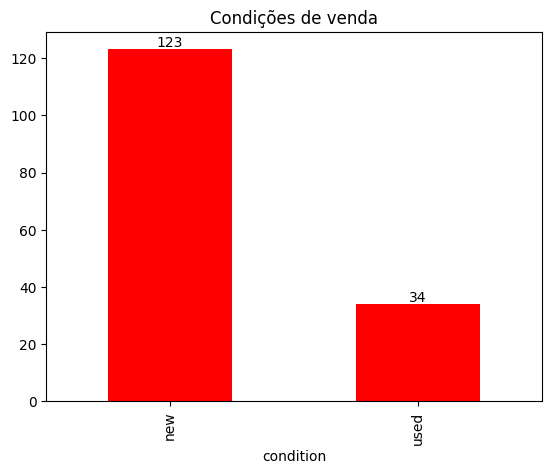

In [33]:
agrupa_condition.plot.bar(color='red').set_title('Condições de venda')

for i, value in enumerate(agrupa_condition):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

Gerando informações de percentual

In [31]:
contagem = df_data['condition'].value_counts()

percentual = contagem / contagem.sum() * 100

Plot de gráfico de pizza informando percentual

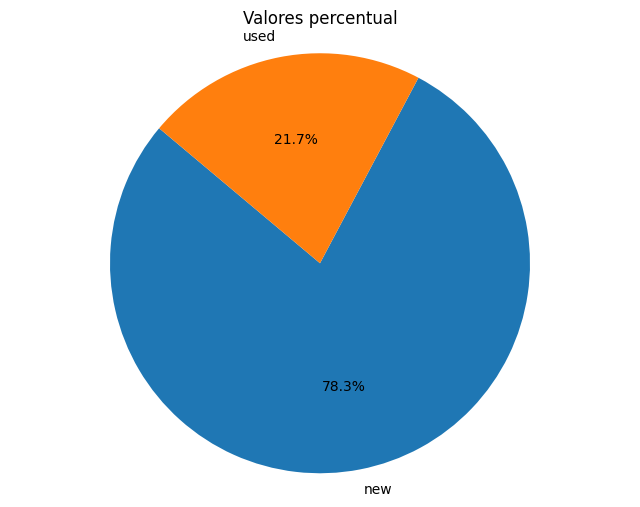

In [32]:
plt.figure(figsize=(8, 6))
plt.pie(percentual, labels=percentual.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Valores percentual')
plt.show()

### **insight análise 01**: 
Com esta análise, é possível obter informações de total de quantidade de notebook disponíveis para venda de acordo com o estado do produto, e mensurar também a quantidade percentual de cada grupo em relação ao cenário total. Isto, por exemplo, pode me direcionar em uma analise de condição dos notebooks disponíveis e definir melhor uma estratégia de gasto estimado, tendo maior direcionamento no famoso "custo x benefício" que é sempre buscado em momentos de compra.

### **Análise 02**: Variação de preço entre nos notebooks

In [12]:
df_data['price'].describe()

count      157.000000
mean      4410.808790
std       4861.519545
min        276.000000
25%       2133.030000
50%       3391.500000
75%       4799.000000
max      42686.070000
Name: price, dtype: float64

Visão 01: Plot de gráfico caixa de variação de preço

Text(0.5, 1.0, 'Variação de valor')

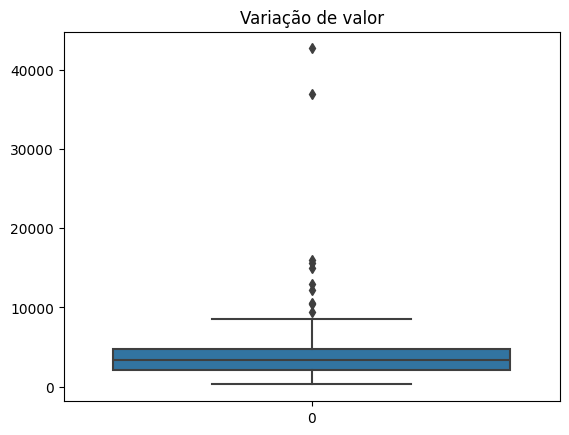

In [13]:
srn.boxplot(df_data['price']).set_title('Variação de valor')

Visão 02: Variação de grafico de variação de preço

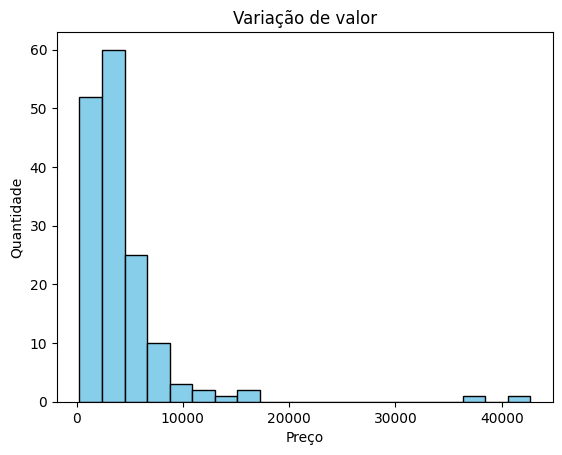

In [37]:
plt.hist(df_data['price'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Preço')
plt.ylabel('Quantidade')
plt.title('Variação de valor')

plt.show()

Analisando os autiliers percebidos nos gráficos anteriores

In [15]:
# Calculando desvio padrão

desv_price = sts.stdev(df_data['price']) # desvio padrão
desv_price

4861.519544558686

Obtendo todos os registros cujo valor é igual ou maior que duas vezes o valor do campo 'price' (ordenados pelo valor)

In [16]:
outlier_price = df_data.loc[(df_data['price'] >= desv_price*2 )]
outlier_price_desc = outlier_price.sort_values(by='price', ascending=False)

outlier_price_desc[['title', 'official_store_name', 'condition', 'available_quantity', 'price']]

,title,official_store_name,condition,available_quantity,price
123,Lenovo 16'' Thinkpad P16 Gen 1 Mobile Workstat...,NaN,new,1,42686.07
122,Lenovo 16' Legion 7i Gaming Notebook Gray,NaN,new,1,36990.00
108,Notebook Gamer Lenovo Legion Y Y540 Raven Bla...,NaN,new,1,15999.00
140,Lenovo Legion Pro 7 Rtx 4080 I9 13900hx,NaN,used,1,15599.00
143,Lenovo - Legion Pro 5i 16 Gaming Laptop Intel...,NaN,used,1,14999.00
74,Notebook Gamer Legion Slim 5i I7-13700h 16gb 1...,NaN,new,1,12998.00
52,Lenovo Gamer Legion Pro 5 82wk00m7us Core I9 R...,NaN,new,1,12191.75
133,Notebook Gamer Lenovo Legion 5i Core I7 10750h...,NaN,used,1,10500.00
109,Notebook Legion Slim 5i I7 16gb 1tb Rtx 4060 W...,Lenovo,new,50,10475.03


Gerando um resumo descritivo do dataframe de resultado

In [17]:
outlier_price.describe()

,order_backend,price,original_price,available_quantity,official_store_id
count,9.000000,9.000000,3.000000,9.000000,1.0
mean,26.555556,19159.761111,22896.310000,6.444444,923.0
std,14.552587,11980.830982,19942.143587,16.333333,NaN
min,5.000000,10475.030000,10475.030000,1.000000,923.0
25%,13.000000,12191.750000,11394.965000,1.000000,923.0
50%,27.000000,14999.000000,12314.900000,1.000000,923.0
75%,37.000000,15999.000000,29106.950000,1.000000,923.0
max,47.000000,42686.070000,45899.000000,50.000000,923.0


### **insight análise 02**: 
Com esta análise, pude perceber a taxa de variação de preço dos notebooks, obtendo o valor médio dos notebooks e os quartis do preço. Informações importantes são fácilmente percebidas, como entender que o preço médio vai até em torno de R$ 3.4k, e até 75% dos valores ficam até em torno de R$ 4.8k. Através destas analises, é percebido também a presença de outliers, aonde obtendo um valor de desvio padrão, é possível obter informações pertinentes para entender se o valor que foi estipulado para o produto se torna realista para quem for querer adquirir o produto, permanecendo na linha de atingir o "custo x benefício" no momento da compra.

### **Análise 3**: Gerar uma nova coluna com a visão de diferença de preço á vista para os produtos que tem opções de parcelamento

In [18]:
df_data['price_difference'] = float('NaN') # Como há valores 'installments' nulo, foi necessário criar antes a coluna

mask = df_data['installments'].notnull() # Obtém apenas quem tem dados de 'installments' (pacelamento)

df_data.loc[mask, 'price_difference'] = df_data.loc[mask, 'installments'].apply(lambda x: x['amount'] * x['quantity'] - x['amount'])

Plot do gráfico de densidade das diferenças de preço

c:\Users\Felipe Alves\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


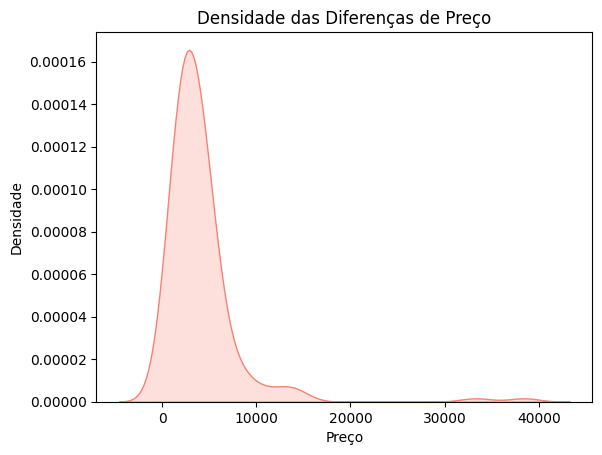

In [19]:
srn.kdeplot(df_data['price_difference'].dropna(), fill=True, color='salmon')
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.title('Densidade das Diferenças de Preço')
plt.show()

Plot do gráfico de dispersão das diferenças de preço em relação ao preço original

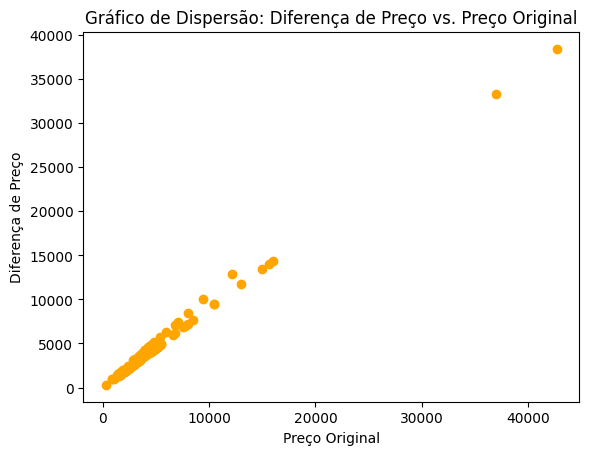

In [20]:
plt.scatter(df_data['price'], df_data['price_difference'], color='orange')
plt.xlabel('Preço Original')
plt.ylabel('Diferença de Preço')
plt.title('Gráfico de Dispersão: Diferença de Preço vs. Preço Original')
plt.show()

### **insight análise 03**: 
Nesta análise foi gerada uma nova coluna aonde pusse se obter informações sobre a diferença de preço á vista para os produtos que tem opções de parcelamento. O objetivo é perceber a distribuição das diferenças de preço entre o valor total do produto e o valor total parcelado, e assim entender aonde o valor se encontra mais concentrado. Com a analise dos gráficos, por exemplo, um dos insights que é possível perceber é o padrão entre essas duas variáveis exibindo que a diferença de preço aumenta à medida que o valor original também aumenta. 

## PERSISTÊNCIA DE DADOS EM ARQUIVO CSV

Exportação de dados para pasta que se encontra o arquivo Jupyter Notebook

In [23]:
hoje = datetime.now()
hoje = hoje.strftime("%Y-%m-%d_%H-%M-%S")

df_data.to_csv(f'dados_dataframe_DF_DATA_{hoje}.csv', index=False, sep='|')